# Practice notebook for multivariate analysis using NHANES data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api
%matplotlib inline

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

<Axes: xlabel='BPXDI1', ylabel='BPXDI2'>

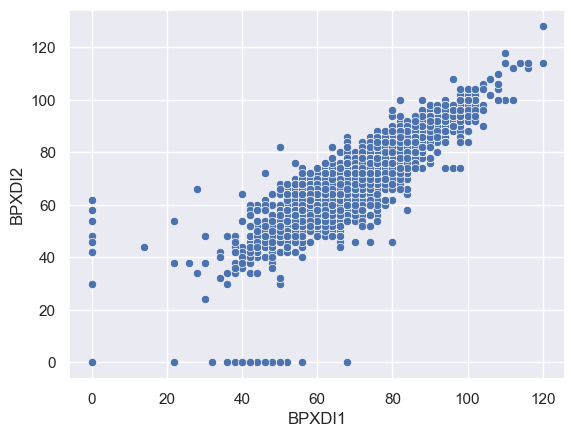

In [4]:
sns.scatterplot(x='BPXDI1', y='BPXDI2', data=da)

In [5]:
da[['BPXDI1', 'BPXDI2', 'BPXSY1', 'BPXSY2']].corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.316531,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.303847
BPXSY1,0.316531,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.303847,0.962287,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The pearson correlation between systolic blood pressure is 96.23%, which means the relationship is very strong.
The correlation between diastolic blood pressure is 88.47%, which indicates the relationship is less than systolic pressure, but it still high enough to consider.


__Q2b.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

          BPXDI1    BPXSY1
BPXDI1  1.000000  0.316531
BPXSY1  0.316531  1.000000


          BPXDI2    BPXSY2
BPXDI2  1.000000  0.303847
BPXSY2  0.303847  1.000000


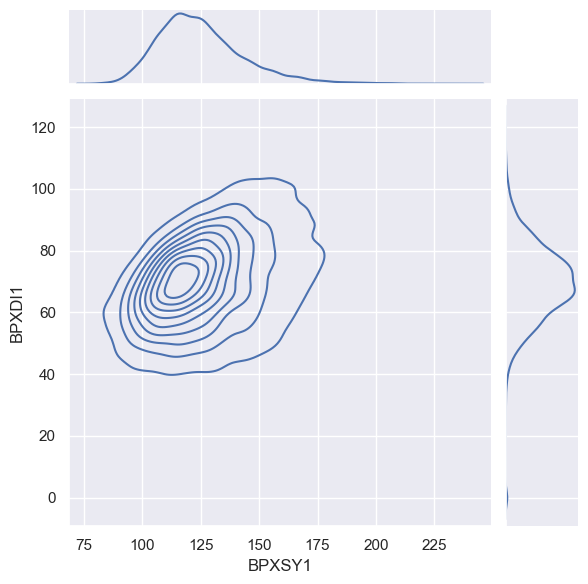

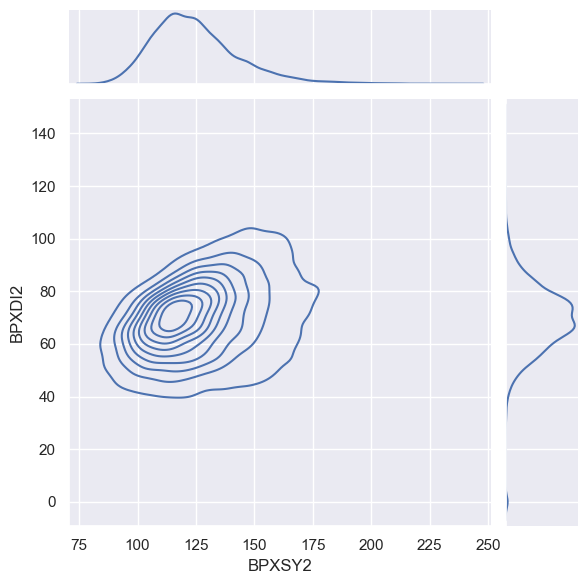

In [6]:
print(da[['BPXDI1','BPXSY1']].corr())
print('\n')
print(da[['BPXDI2','BPXSY2']].corr())
sns.jointplot(y='BPXDI1', x='BPXSY1', data=da, kind='kde')
sns.jointplot(y='BPXDI2', x='BPXSY2', data=da, kind='kde')

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


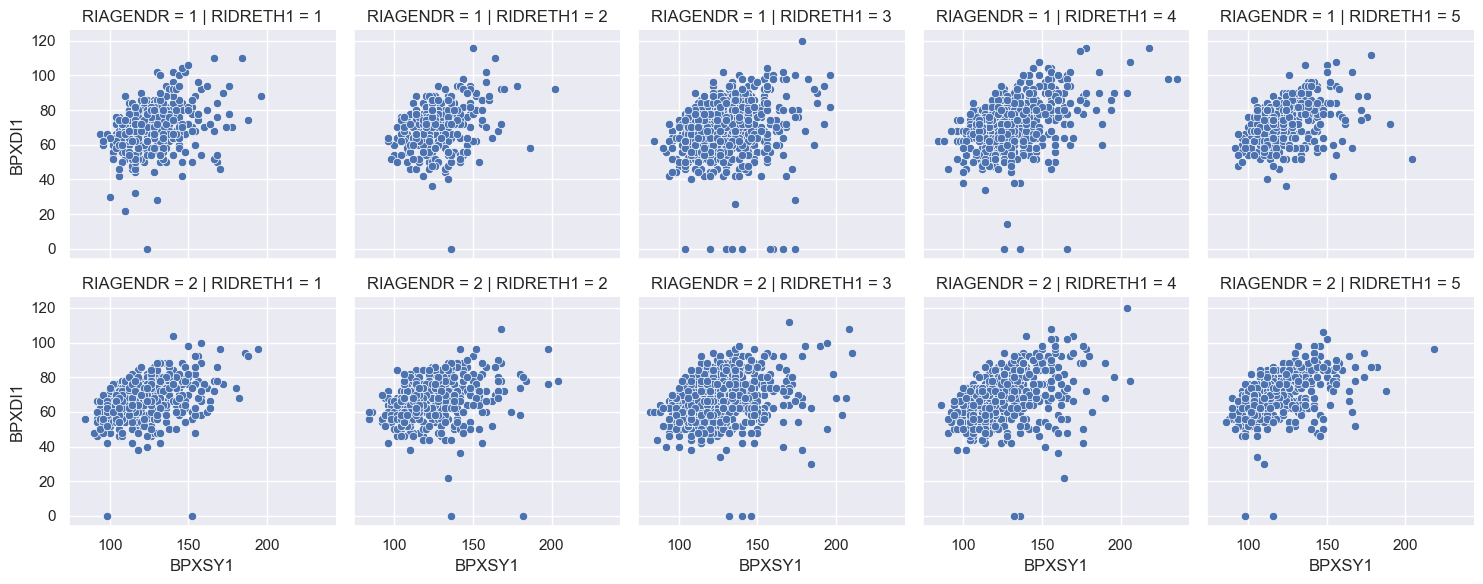

In [7]:
# insert your code here
sns.FacetGrid(data=da, row='RIAGENDR', col='RIDRETH1').map(sns.scatterplot, 'BPXSY1', 'BPXDI1')

__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

The first systolic and diastolic blood pressure measurement are roughly similar pattern on all genders and races.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

<Axes: xlabel='DMDEDUC2', ylabel='RIDAGEYR'>

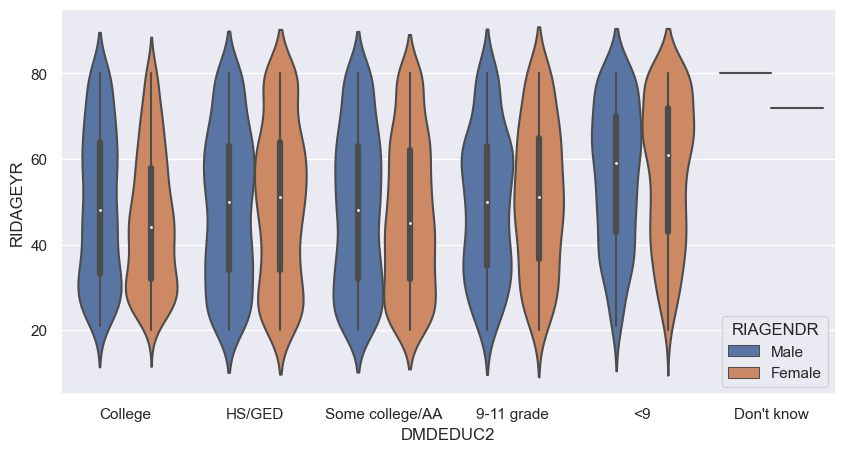

In [12]:
# insert your code here
da['DMDEDUC2'] = da['DMDEDUC2'].replace({1:'<9', 2:'9-11 grade', 3:'HS/GED', 4:'Some college/AA',
                                         5:'College', 7:'Refused', 9:"Don't know", '.':'Missing'})
da['RIAGENDR'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'})
plt.figure(figsize=(10,5))
sns.violinplot(x='DMDEDUC2', y='RIDAGEYR', hue='RIAGENDR', data=da)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

The age dirstribution of College and Some college/AA are right-skewed whereas <9th grade eduation is left-skewed. The HS/GED and 9-11 grade seems like symmetrical.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [20]:
da.RIDAGEYR.describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

<Axes: xlabel='RIDAGEYR', ylabel='BMXBMI'>

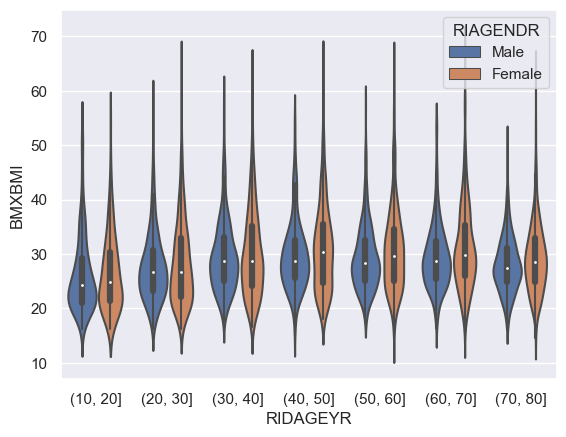

In [19]:
bins = pd.cut(x=da['RIDAGEYR'], bins=[10,20,30,40,50,60,70,80])
sns.violinplot(y='BMXBMI', hue='RIAGENDR', x=bins, data=da)

__Q5a.__ Comment on the trends in BMI across the demographic groups.

The BMI values for both male and female are right-skewed in lower age, especially skeweness to the right in female. The higher age range, the more median value moved to middle.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [32]:
da.RIDRETH1 =  da['RIDRETH1'].replace({1:'Mexican', 2:'Hispanic', 3:'Non-hispanic White',
                                         4:'Non-hispanic black', 5:'Other race', '.':'Missing'})
da.HIQ210 = da.HIQ210.replace({1:'Yes', 2:'No', 7:'Refused', 9:"Don't know", '.':'Missing'})
da.HIQ210.fillna('Missing', inplace=True)

In [34]:
data = pd.crosstab(index=da['RIDRETH1'], columns=da['HIQ210'])
data.apply(lambda x: x/sum(x), axis=1)

HIQ210,Don't know,Missing,No,Yes
RIDRETH1,,,,
Hispanic,0.000000,0.233333,0.668000,0.098667
Mexican,0.002947,0.337917,0.567780,0.091356
Non-hispanic White,0.001088,0.103861,0.834693,0.060359
Non-hispanic black,0.000815,0.152404,0.754686,0.092095
Other race,0.002220,0.117647,0.807991,0.072142


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Non-hispanic white